## 用tensorflow来拟合函数

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return x**2 + x * np.cos(x) + np.sin(x)


In [2]:
# 生成训练数据
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_train = target_function(x_train)

# 定义神经网络结构
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [3]:
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(x_train, y_train, epochs=1000, verbose=1)


Train on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 757us/sample - loss: 249.6539
Epoch 2/1000
1000/1000 [==============================] - 0s 74us/sample - loss: 159.4091
Epoch 3/1000
1000/1000 [==============================] - 0s 65us/sample - loss: 85.3289
Epoch 4/1000
1000/1000 [==============================] - 0s 58us/sample - loss: 47.1398
Epoch 5/1000
1000/1000 [==============================] - 0s 35us/sample - loss: 34.3325
Epoch 6/1000
1000/1000 [==============================] - 0s 83us/sample - loss: 31.1442
Epoch 7/1000
1000/1000 [==============================] - 0s 49us/sample - loss: 29.8287
Epoch 8/1000
1000/1000 [==============================] - 0s 33us/sample - loss: 28.7560
Epoch 9/1000
1000/1000 [==============================] - 0s 50us/sample - loss: 27.4697
Epoch 10/1000
1000/1000 [==============================] - 0s 83us/sample - loss: 26.1833
Epoch 11/1000
1000/1000 [==============================] - 0s 50us/sample - loss: 24

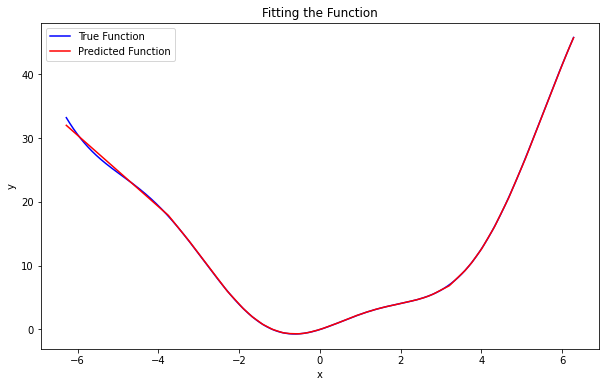

In [4]:
# 对新的数据进行预测
x_test = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_pred = model.predict(x_test)

# 绘制拟合结果
plt.figure(figsize=(10, 6))
plt.plot(x_test, target_function(x_test), label='True Function', color='blue')
plt.plot(x_test, y_pred, label='Predicted Function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the Function')
plt.legend()
plt.show()


## 用numpy来拟合函数

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return x**2 + x * np.cos(x) + np.sin(x)


In [6]:
# 生成训练数据
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_train = target_function(x_train)

In [7]:
# 定义神经网络结构
class Relu:
    def forward(self, x):
        return np.maximum(0, x)
    
    def backward(self, grad_y):
        grad_x = np.where(self.forward(grad_y) > 0, grad_y, 0)
        return grad_x

In [8]:

# 定义模型
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
        self.relu = Relu()
    
    def forward(self, x):
        self.h1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu.forward(self.h1)
        self.h2 = np.dot(self.a1, self.W2) + self.b2
        return self.h2
    
    def backward(self, x, grad_output, learning_rate):
        grad_h2 = grad_output
        grad_W2 = np.dot(self.a1.T, grad_h2)
        grad_b2 = np.sum(grad_h2, axis=0)
        grad_a1 = np.dot(grad_h2, self.W2.T)
        grad_h1 = self.relu.backward(grad_a1)
        grad_W1 = np.dot(x.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0)

        # Update weights and biases
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2

In [9]:

# 编译模型
model = TwoLayerNet(input_size=1, hidden_size=32, output_size=1)

# 训练参数
learning_rate = 0.001
epochs = 1000

# 训练
for epoch in range(epochs):
    # Forward pass
    y_pred = model.forward(x_train)
    
    # 计算loss
    loss = np.mean(np.square(y_pred - y_train))
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
    
    # Backward pass
    grad_output = 2 * (y_pred - y_train) / len(x_train)
    model.backward(x_train, grad_output, learning_rate)


Epoch 0, Loss: 203.49373161659943
Epoch 100, Loss: 19.533194195940666
Epoch 200, Loss: 24.330985592442282
Epoch 300, Loss: 28.814445882171004
Epoch 400, Loss: 11.080593231601556
Epoch 500, Loss: 8.704100004623749
Epoch 600, Loss: 6.56218493993547
Epoch 700, Loss: 5.0821937440061395
Epoch 800, Loss: 4.077213707003723
Epoch 900, Loss: 3.4391068358907315


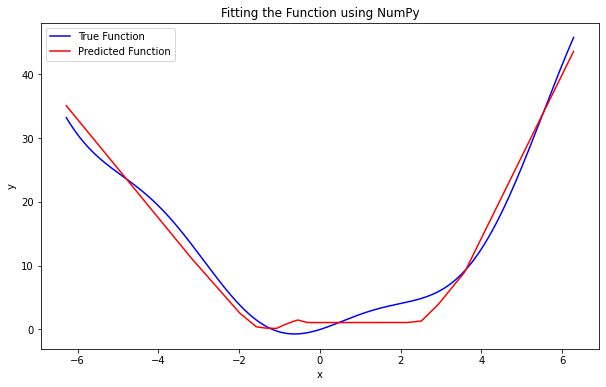

In [10]:
# 预测
x_test = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_pred = model.forward(x_test)

# 展示结果
plt.figure(figsize=(10, 6))
plt.plot(x_test, target_function(x_test), label='True Function', color='blue')
plt.plot(x_test, y_pred, label='Predicted Function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the Function using NumPy')
plt.legend()
plt.show()